# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise

In this exercise, we will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of our own 


### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [21]:
# Read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [37]:
# Deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

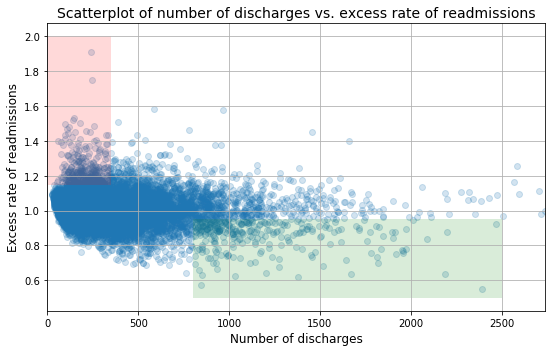

In [38]:
# Generate a scatterplot for number of discharges vs. excess rate of readmissions
# Lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## Further Analysis

In [43]:
# Shorten dataframe name
hospital = clean_hospital_read_df.copy()

### Do you agree with the above analysis and recommendations?

The analysis above appears to be accompanied by several flaws in its conclusions that there is a significant correlation between hospital capacity (number of discharges) and readmission rates.  Because of flawed methods leading to the conclusion, the recommendations may also be incorrect.

The correlation between hospital capacity and readmission rates, although assumed through a scatterplot, was not validated via statistical analysis and hypothesis testing for statistical significance.  There is also a large amount of data missing in the 'Excess Readmission Ratio' column.

In [44]:
# Drop null values in 'Excess Readmission Ratio' column
hospital = hospital.dropna(subset=['Excess Readmission Ratio'])
print(hospital.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB
None


### Support for the argument, recommendations and a statistically sound analysis:

Setup an appropriate hypothesis test, compute and report the observed significance value (p-value) with a  statistical significance for $\alpha$ = .01.


- **Null hypothesis:** there is no significant correlation between hospital capacity (number of discharges) and readmission rates.

- **Alternative hypothesis:** there is a significant correlation between hospital capacity (number of discharges) and readmission rates.

- **Test statistics:** Pearson Correlation Coefficient - $\rho$

- **Significance level:** $\alpha$ = 0.01


### Normality Testing

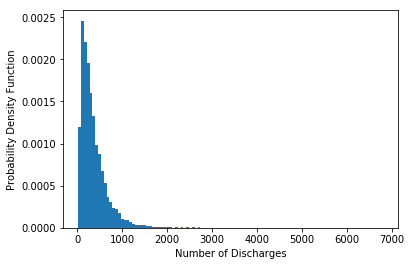

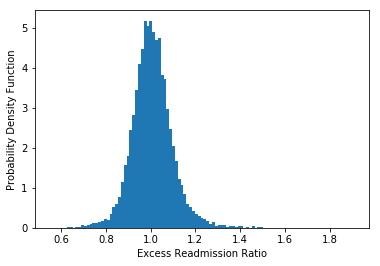

The p-value for "Number of Discharges" is 0.0
The p-value for "Excess Readmission Ratio" is 0.0


In [50]:
# Set up a normality test
x = hospital['Number of Discharges']
y = hospital['Excess Readmission Ratio']

# Check for normal distribution
_ = plt.hist(x, bins=int(np.sqrt(len(x))), density=True)
_ = plt.xlabel("Number of Discharges")
_ = plt.ylabel("Probability Density Function")
plt.show()

_ = plt.hist(y, bins=int(np.sqrt(len(y))), density=True)
_ = plt.xlabel("Excess Readmission Ratio")
_ = plt.ylabel("Probability Density Function")
plt.show()

# Test for normality
x_k, x_p = stats.normaltest(x)
print('The p-value for "Number of Discharges" is {}'.format(x_p))
y_k, y_p = stats.normaltest(y)
print('The p-value for "Excess Readmission Ratio" is {}'.format(y_p))

Although resembling normal distribution, 'Excess Readmission Ratio' is not normally distributed.  Also, 'Number of Discharges' is positively skewed and not normally distributed.


### Permutation for Correlation

Because the variables are not normally distributed, a pearson correlation coefficient, alone, will not work in obtaining a valid p-value.  It will be best to permute the samples (randomly re-pairing x and y) in order to create a distribution of pearson coefficients, assuming the Null hypothesis is true.

Probability from a permutation test is computed by comparing the observed test statistic against the permutation replicates, rather than theoretical variables.  Because of this, normal distribution does not have to be met in order to draw a valid inference.

In [66]:
# Define pearson correlation
def pearson_r(a, b):
    """compute and return the pearson correlation coefficient r between two arrays"""
    corr_mat = np.corrcoef(a,b)
    return corr_mat[0,1]

# Calculate the observed pearson coefficient for 'Number of Discharges' (x) and 'Excess Readmission Ratio' (y)
r = pearson_r(x,y)

#-------------------------------------------------------

# Initialize permutation replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    
    # Permute x, keep y unchanged
    perm_x = np.random.permutation(x)
    
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(perm_x, y)
    
#-------------------------------------------------------    

# Compute p-value using replicates that are as extreme as observed sample
p = np.sum(perm_replicates <= r)/len(bs_reps)

print('The observed Pearson\'s Correlation Coefficient is {}'.format(r))
print('The p-value is {}'.format(p))
print('There are {} replicates out of 10,000 as extreme as the observed sample'.format(np.sum(perm_replicates <= r)))

The observed Pearson's Correlation Coefficient is -0.09309554287590442
The p-value is 0.0
There are 0 replicates out of 10,000 as extreme as the observed sample


The p-value is 0 suggesting that we reject the null hypothesis, there is no significant correlation between hospital capacity (number of discharges) and readmission rates, and accept the alternative hypothesis, there is a significant correlation between hospital capacity (number of discharges) and readmission rates.


### Statistical Significance vs. Practical Significance

**Statistical Significance:** The hypothesis testing procedure that determines whether the sample results that you obtain are likely if you assume the null hypothesis is correct for the population. If the results are sufficiently improbable under that assumption, then you can reject the null hypothesis and conclude that an effect exists. In other words, the strength of the evidence in your sample has passed your defined threshold of the significance level (alpha). Your results are statistically significant.

**Practical Significance:** While statistical significance relates to whether an effect exists, practical significance refers to the magnitude of the effect. However, no statistical test can tell you whether the effect is large enough to be important in your field of study. Instead, you need to apply your subject area knowledge and expertise to determine whether the effect is big enough to be meaningful in the real world. In other words, is it large enough to care about?

Statistical significance does not guarantee practical significance, but to be practically significant, data must be statistically significant.

____________________________________________________

The statistical analysis does suggest that a correlation between hospital capacity (number of discharges) and readmission rates is statistically significant.  But the correlation coefficient suggests a weak negative correlation between the two, therefore a less likely practical significance between the two.  

Further evaluation is needed to determine a suitable recommendation to reduce readmission rates.


### Advantages and Disadvantages of the Above Scatterplot:

**Advantage:** The relationship between the two variables are easily displayed.

**Disadvantage:** The plots are misleading, showing a much stronger negative correlation than statistically observed.  With a large dataset, scattered points tend to overlap and extreme values tell a bigger story than the actual data.  In other words, most of the data was lumped together, but the outliers led the eye to believe in a bigger negative correlation than statistically observed.

We will construct another plot that conveys the same information in a more direct manner by adding a regression line.

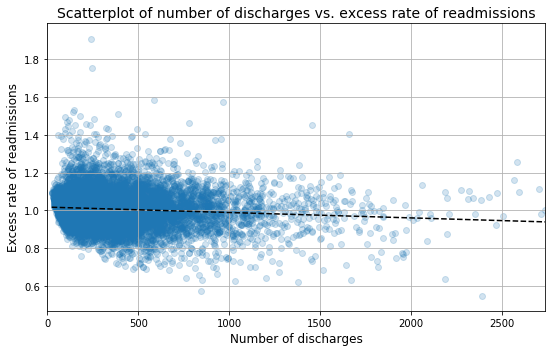

In [99]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

# Set up regression line
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)


fig, ax = plt.subplots(figsize=(8,5))


ax.scatter(x, y, alpha=0.2)

# Add regression line
ax.plot(x, fit_fn(x), '--k')


ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()